<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/One_dimensional_Brownian_motion_path_simulation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exact sampling of Brownian path and GBM path**

Goal:
- Exact sampling of Brownian motion path
- Exact sampling of Geometric Brownian path

### **1. Brownian path**

Let time mesh $\Pi$ be of the form

$$\Pi = \{0 = t_{1} \leq t_{2} \leq \dots \leq t_{N} = T  \}.$$

We use 

$$<W, \Pi> = \{W(t): t \in \Pi \}$$

the projection of the Brownian path on $\Pi$. To have a simulation of Brownian path by random walk, one can iterate

$$W(t_{i+1}) = W(t_{i}) + \sqrt{t_{i+1} - t_{i}} Z_{i+1}.$$



#### **Exercise 1:**

Let uniform mesh be denoted by

$$\Pi_{T, N} = \{i T/N: i = 0, 1, \dots, N \} .$$

- Write the pseudocode.
- Prove that $\hat{W}$ is an exact sampling.
- Draw $10$ path simulations of $t \mapsto \frac{W(t)}{\sqrt{2t \log \log t}}$ on interval $t = [100, 110]$ with mesh size $h = 0.1$.



#### **Solution:**



(1) The pseudocode as follows:

[pseudocode](https://github.com/JiaminJIAN/20MA573/blob/master/src/HW6_pesudocode1.png)



(2) For the Brownian motiton $W_{t}$, we know that for any $s < t$, $W_{t} - W_{s}$ is independent of $\mathcal{F}_{s}$ and $W_{t} - W_{s} \sim \mathcal{N}(0, t-s)$.

Since $\{Z_{i}\}_{i = 1}^{N}$ is a sequence of identity independent distribution random variables, and when $\hat{W}(t_0) = 0$, then we have

$$\hat{W}(t_{i+1}) - \hat{W}(t_{i}) \sim \mathcal{N}(0, t_{i+1} - t_{i})$$

and $\hat{W}(t_{i+1}) - \hat{W}(t_{i})$ are independent of each other. Thus we know that for $i = 1, 2, \dots, N$, $\hat{W}(t_{i+1}) \sim \mathcal{N}(0, t_{i+1})$. So, $\hat{W}$ is exact sampling of Brownian motion.


(3) Draw $10$ path simulations of $t \mapsto \frac{W(t)}{\sqrt{2t \log \log t}}$ on interval $t = [100, 110]$ with mesh size $h = 0.1$.

Firstly, we import the basic packages we need.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as ss
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

Then we build a function to get the exact sampling of Brownian motion.


In [0]:
# define a function of BM path generator

def exsampling_bm_gen(T1, T2, n):    # parameters: start time, end time, and the mesh number 
    t = np.linspace(T1, T2, num = n+1)   # init mesh
    h = 1/n   # the scale of each step
    W = np.zeros(n+1)   # init BM with 0 
    ## W[0] = np.random.normal(0, np.sqrt(T1))   
    for i in range(n):
        W[i+1] = W[i] + np.sqrt(h) * np.random.normal()   
    return t, W


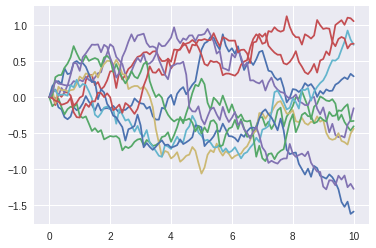

In [3]:
## Test the exsampling_bm_gen and plot
MeshN = 100   # Mesh number
SimN = 10     # Simulation number

for i in range(SimN):
    [t, W] = exsampling_bm_gen(0., 10., MeshN)
    plt.plot(t, W);

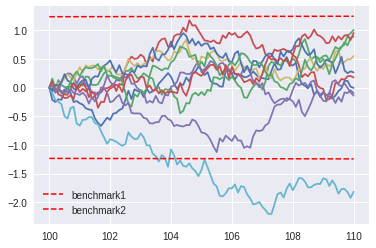

In [4]:
T1 = 100; T2 = 110; # The time interval

MeshN = 100   # Mesh number
SimN = 10     # Simulation number

for i in range(SimN):
    [t, W] = exsampling_bm_gen(T1, T2, MeshN)
    plt.plot(t, W);

y1 = np.sqrt(np.log(np.log(t)))
y2 = - np.sqrt(np.log(np.log(t)))

plt.plot(t, y1, color='r', ls='dashed', lw=1.5, label='benchmark1')
plt.plot(t, y2, color='r', ls='dashed', lw=1.5, label='benchmark2')
plt.legend()

The path of Brownian motion may across the benchmark built by the function $\frac{W(t)}{\sqrt{2t \log \log t}}$, we can change the time scale to $[1000, 10000]$, and the figure is as follows:

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


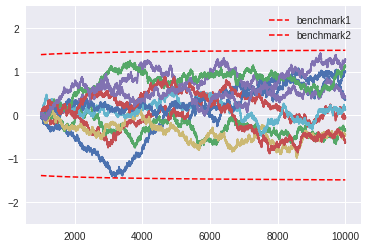

In [5]:
T1 = 1000; T2 = 10000; # The time interval

MeshN = 100000   # Mesh number
SimN = 10     # Simulation number

for i in range(SimN):
    [t, W] = exsampling_bm_gen(T1, T2, MeshN)
    plt.plot(t, W);

y1 = np.sqrt(np.log(np.log(t)))
y2 = - np.sqrt(np.log(np.log(t)))

plt.plot(t, y1, color='r', ls='dashed', lw=1.5, label='benchmark1')
plt.plot(t, y2, color='r', ls='dashed', lw=1.5, label='benchmark2')
plt.ylim(-2.5, 2.5)
plt.legend()

### **2. Geometric Brownian path**

$GBM(x_{0}, r, \sigma)$ is given by 

$$X(t) = x_{0} exp \{(r - \frac{1}{2} \sigma^{2})t + \sigma W(t)\}.$$

We can replace $W(t)$ by its exact simulation $\hat{W}(t)$ to get exact simulation of $X(t)$, i.e.

$$\hat{X}(t) = x_{0} exp \{(r - \frac{1}{2} \sigma^{2})t + \sigma \hat{W}(t)\}.$$

Basing on the a stock example, we can plot the path of GBM.

In [0]:
## An example of stock is as follows:

S0 = 100.0
K = 110.0
r=0.0475
sigma = 0.20
T = 1.
Otype='C'

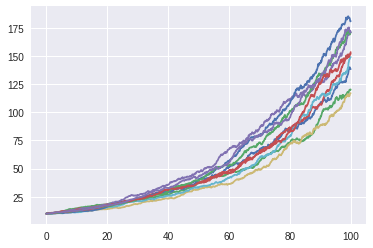

In [7]:
T1 = 0; T2 = 100; # The time interval

MeshN = 1000   # Mesh number
SimN = 10     # Simulation number
S0 = 10      # the initial value of the stock

for i in range(SimN):
    [t, W] = exsampling_bm_gen(T1, T2, MeshN)
    S = S0 * np.exp((r - sigma**2/2) * t + sigma * W)  #GBM path
    plt.plot(t, S);

### **3. Application to Arithmetic asian option price**

Arithmetic asian call option with maturity $T$ and strick price $K$ has its pay off as 

$$C(T) = (A(T)- K)^{+},$$

where $A(T)$ is arithemtic average of the stock price at times $0 \leq t_{1} \leq t_{2} \leq \dots, t_{n}  = T$, i.e.

$$A(T) = \frac{1}{n} \sum_{n = 1}^{n} S(t_{i}).$$

The call price can be thus written by

$$C_{0} = \mathbb{E}^{\mathbb{Q}} [e^{-rT} (A(T) - K)^{+}].$$

Unlike the geometric asian option, arithmetic counterpart dose not have explict formula for its price. In this below, we shall use MC. In practice, an arithmetic asian option with a given number n of time steps takes the price average at $n+1$ points

$$t_{i} = (i-1) \frac{T}{n}, \quad i = 1, 2, 3, \dots, (n+1).$$

#### **Exercise 3:**

Consider Arithmatic asian option price on $BSM$ by exact sampling.

- Write a pseudocode for arithmetic asian price on BSM
- To the GBM class, add a method
$$arasian(otype, strike, maturity, nstep, npath)$$
for the price by exact sampling.
- Use your code to compute Arithmetic asian option of
$$s_{0} = 100, \sigma = 0.20, r = 0.0475, K = 110.0, T = 1.0, otype = 1, nstep = 5.$$



(1) The pseudocode is as follows:

[pseudocode](https://github.com/JiaminJIAN/20MA573/blob/master/src/HW6_pesudocode2.png)


(2) To the GBM class, add a method $arasian(otype, strike, maturity, nstep, npath)$ for the price by exact sampling.

In [0]:

class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])


class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2,
                 steps = 5,
                 sim_number = 1000
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio
        self.steps = steps
        self.sim_number = sim_number

    def bsm_price(self, vanilla_option):
      s0 = self.init_state
      sigma = self.vol_ratio
      r = self.drift_ratio
        
      otype = vanilla_option.otype
      k = vanilla_option.strike
      maturity = vanilla_option.maturity
        
      d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
              * maturity) / (sigma * np.sqrt(maturity))
      d2 = d1 - sigma * np.sqrt(maturity)
        
      return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
                - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

    #Gbm.bsm_price = bsm_price


    def arasian(self, vanilla_option):
      s0 = self.init_state
      sigma = self.vol_ratio
      r = self.drift_ratio
      n = self.steps
      sim_N = self.sim_number
        
      otype = vanilla_option.otype
      k = vanilla_option.strike
      maturity = vanilla_option.maturity

      price = 0

      for j in range(sim_N):
        t = np.linspace(0, maturity, n+1)   # init mesh
        h = 1/n   # the scale of each step
        W = np.zeros(n+1)   # init BM with 0
        ## W[0] = np.random.normal(0, np.sqrt(T1))         
        for i in range(n):
          W[i+1] = W[i] + np.sqrt(h) * np.random.normal()   
        S = s0 * np.exp((r - sigma**2/2.) * t + sigma * W)  #GBM path
        AT = np.mean(S)
        price = price + np.exp(-r*maturity)*np.max([AT-k, 0])
      return price/sim_N

(3) Use your code to compute Arithmetic asian option of
$$s_{0} = 100, \sigma = 0.20, r = 0.0475, K = 110.0, T = 1.0, otype = 1, nstep = 5.$$

Using the class above, we can get the price of Arithmetic asian call option.

In [9]:
gbm1 = Gbm()
option1 = VanillaOption()

gbm1.arasian(option1)

1.8053824033960157

We can also get the price of the call option by Gbm.

In [10]:
option_price = gbm1.bsm_price(option1)
print(option_price)

5.943273183452838


We can see that the price of European call option is more larger than the Arithmetic asian call option with the same parameters.